In [1]:
from wv_utils import reduce_dimensions, create_angle_matrix
from note_reader import get_notes_as_pitch_classes
from gensim.models import Word2Vec, FastText
import matplotlib.pyplot as plt
import pandas as pd
import glob

In [2]:
plt.rcParams["font.family"] = ["Times"]
UNK_TAG = "<UNK>"

In [3]:
file_list = glob.glob("data/txt/*.txt")

In [4]:
docs, counts = get_notes_as_pitch_classes(file_list)

In [5]:
pitches_sorted = counts.most_common()
pitches, pitch_counts = zip(*pitches_sorted)

In [6]:
THRESHOLD = 20

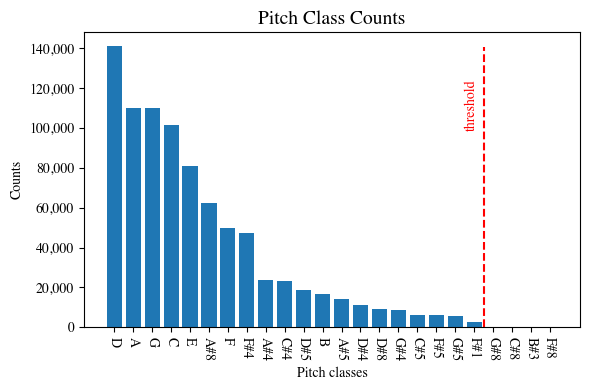

In [7]:
fig = plt.figure(figsize=(6, 4))
plt.title("Pitch Class Counts", fontdict={"fontsize": 14})
plt.xlabel("Pitch classes")
plt.xticks(rotation=-90)
plt.ylabel("Counts")
plt.gca().yaxis.set_major_formatter(
    plt.matplotlib.ticker.StrMethodFormatter("{x:,.0f}"))
plt.bar(pitches, pitch_counts)
plt.tight_layout()
plt.axvline(x=THRESHOLD-0.5, ymax=0.95, color="r", linestyle="--")
plt.text(THRESHOLD-1.5, 100000, "threshold", rotation=90, color="r")
plt.show()

In [8]:
common_pitches = [x[0] for x in counts.most_common(THRESHOLD)]
common_docs = []
for doc in docs:
    common_doc = [x if x in common_pitches else UNK_TAG for x in doc]
    common_docs.append(common_doc)

# Word2Vec model


In [9]:
w2v_model = Word2Vec(sentences=common_docs,
                     vector_size=10, epochs=100, window=7)
w2v_model.wv.most_similar(positive=["C", "A"], negative=["G"], topn=3)  # D

[('A#8', 0.5417097806930542),
 ('D', 0.4931430220603943),
 ('B', 0.36778613924980164)]

In [10]:
w2v_model.wv.most_similar("G")

[('F#4', 0.7235310077667236),
 ('D#5', 0.4131792187690735),
 ('D#8', 0.312949538230896),
 ('G#5', 0.3027667701244354),
 ('A#4', 0.2618163228034973),
 ('D#4', 0.2020414024591446),
 ('A', 0.039485979825258255),
 ('C#4', -0.0058392127975821495),
 ('A#5', -0.03174911066889763),
 ('G#4', -0.04975614696741104)]

In [11]:
w2v_model.wv.similarity("G", "A")

0.039485976

# FastText model


In [12]:
ft_model = FastText(sentences=common_docs,
                    vector_size=10, epochs=100, window=5)
wv = ft_model.wv
wv.most_similar(positive=["C", "A"], negative=["G"])  # D

[('D', 0.562462329864502),
 ('A#8', 0.548599898815155),
 ('C#5', 0.3469632565975189),
 ('B', 0.25978854298591614),
 ('E', 0.2370859533548355),
 ('F#1', 0.055521849542856216),
 ('C#4', -0.07828190922737122),
 ('A#4', -0.10298085957765579),
 ('F#5', -0.1721627414226532),
 ('A#5', -0.24143967032432556)]

In [13]:
angles_dict = create_angle_matrix(wv)
df = pd.DataFrame.from_dict(angles_dict)
# df.to_excel("results/angles.xlsx")

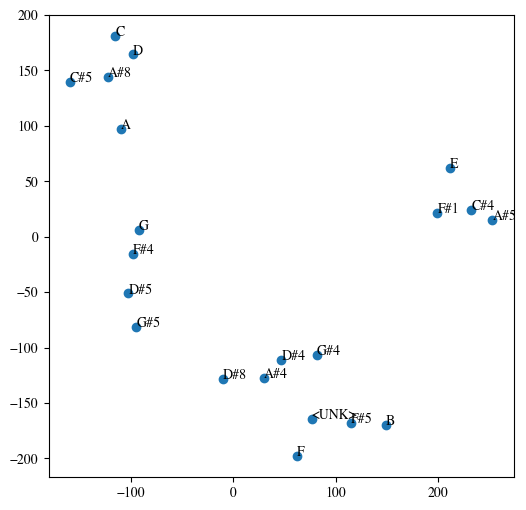

In [14]:
x_vals, y_vals, labels = reduce_dimensions(wv)
plt.figure(figsize=(6, 6))
plt.scatter(x_vals, y_vals)

for i in range(len(labels)):
    plt.annotate(labels[i], (x_vals[i], y_vals[i]))